In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Engineering Student Count Details (College wise - Branch wise).csv')

data['Zone'] = data['Zone'].fillna(method='ffill')

data['Group'] = data['Group'].fillna(method='ffill')

data = data[(data['Category Name'] != 'Architecture') & (data['Category Name'] != 'Affiliated Autonomous')]


#copy data to xdata
xdata = data.copy()
#delete branch from xdata
del xdata['branch']

#merge rows with same college code
xdata = xdata.groupby(['College Code','College Name','Zone','Group','Category Name','University','District']).sum().reset_index()
#delete rows with less than 20 total students or 1st year students
condition1 = xdata['Total No of students'] <= 20
condition2 = xdata['1st year'] <= 20
xdata = xdata[condition1 | condition2]


#delete rows from data where college code is in xdata
data = data[~data['College Code'].isin(xdata['College Code'])]


In [3]:
one_a_data = data.copy()
del one_a_data['branch']
one_a_data = one_a_data.groupby(['College Code','College Name','Zone','Group','Category Name','University','District']).sum().reset_index()
one_a_data = one_a_data.groupby('Zone').agg({'College Code': 'count', '1st year':'sum', 'Total No of students': 'sum'}).reset_index()
one_a_data

,Zone,College Code,1st year,Total No of students
0,Zone I : Chennai-I,19,5516,20028
1,Zone II : Chennai-II,18,7451,24384
2,Zone III : Chennai-III,16,7227,25465
3,Zone IV : MIT - Chromepet,19,6476,22331
4,Zone IX : Coimbatore - I,27,7814,27981
5,Zone V : Tindivanam,9,2505,7987
6,Zone VI : Arni,13,2604,9418
7,Zone VII : Dharmapuri,14,4240,14469
8,Zone VIII : Salem,27,10087,34868
9,Zone X : Coimbatore - II,14,5486,18479


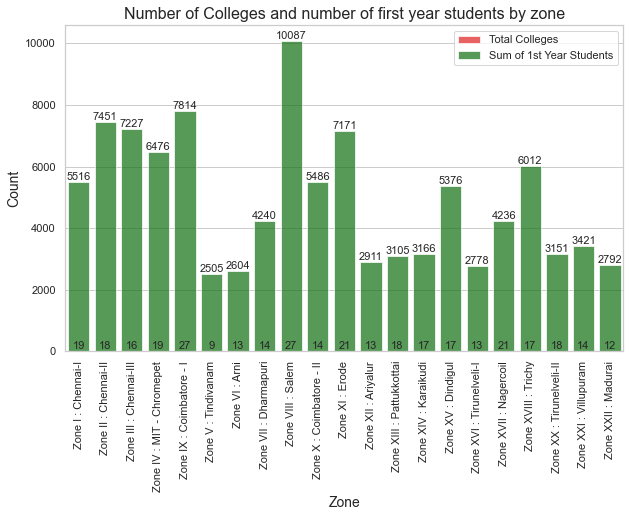

In [4]:
sns.set(style = 'whitegrid')
fig, ax = plt.subplots(figsize = (10,6))

sns.barplot(x='Zone', y='College Code', data = one_a_data, color = 'red', alpha = 0.7, label = 'Total Colleges')
sns.barplot(x='Zone', y='1st year', data = one_a_data, color = 'green', alpha = 0.7, label = 'Sum of 1st Year Students')

ax.set_xlabel('Zone', fontsize = 14)
ax.set_ylabel('Count', fontsize = 14)
ax.set_title('Number of Colleges and number of first year students by zone', fontsize = 16)
plt.xticks(rotation = 90)
plt.legend(loc = 'upper right')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type = 'edge', labels = one_a_data.iloc[:, i+1], fontsize = 11)
plt.show()

In [5]:

data.loc[data['branch'].isnull(), 'branch'] = 'Others'
data.loc[:, 'Disciplines'] = 'OTHER'


data.loc[data['branch'].str.contains('computer', case = False), 'Disciplines'] = 'CS'
data.loc[data['branch'].str.contains('Artificial Intelligence', case = False), 'Disciplines'] = 'CS'

data.loc[data['branch'].str.contains('information', case = False), 'Disciplines'] = 'IT'

data.loc[data['branch'].str.contains('mech', case = False), 'Disciplines'] = 'MECH'
data.loc[data['branch'].str.contains('auto', case = False), 'Disciplines'] = 'MECH'

data.loc[data['branch'].str.contains('communication', case = False), 'Disciplines'] = 'ECE'
data.loc[data['branch'].str.contains('electronics', case = False), 'Disciplines'] = 'ECE'

data.loc[data['branch'].str.contains('electrical', case = False), 'Disciplines'] = 'EEE'

data.loc[data['branch'].str.contains('civil', case = False), 'Disciplines'] = 'CIVIL'

data.to_csv('my_dataframe.csv', index=False)



In [18]:
one_b_data = data.groupby(['Zone', 'Disciplines']).size().reset_index(name='count')

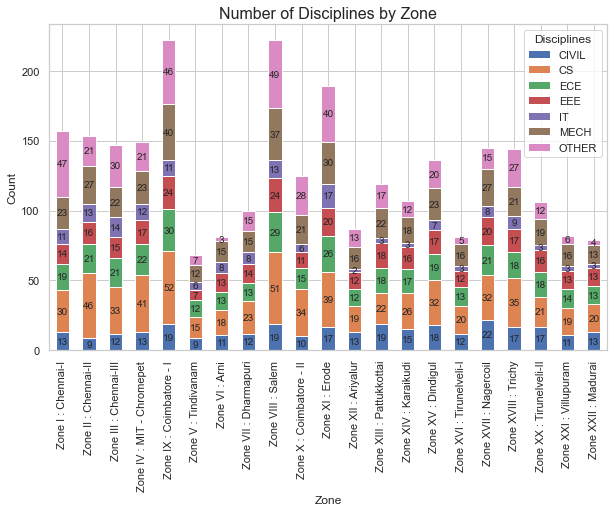

In [7]:
pivoted = one_b_data.pivot(index='Zone', columns='Disciplines', values='count').fillna(0)

ax = pivoted.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.set_xlabel('Zone')
ax.set_ylabel('Count')
ax.set_title('Number of Disciplines by Zone', fontsize = 16)


for i, patch in enumerate(ax.patches):
    x = patch.get_x() + patch.get_width() / 2
    y = patch.get_y() + patch.get_height() / 2
    count = int(patch.get_height())
    ax.text(x, y, count, ha='center', va='center')

plt.show()

In [8]:
one_c_data = data.groupby('Zone').agg({'College Name': 'nunique', 'Total No of students': 'sum'})

print(one_c_data)

# Compute the maximum and minimum number of colleges and students
max_colleges = one_c_data['College Name'].idxmax()
max_students = one_c_data['Total No of students'].idxmax()
min_colleges = one_c_data['College Name'].idxmin()
min_students = one_c_data['Total No of students'].idxmin()

# Compute the average number of colleges across zones
avg_colleges = one_c_data['College Name'].mean()

# Print the results
print(f"Zone with maximum number of colleges: {max_colleges}")
print(f"Zone with maximum number of students: {max_students}")
print(f"Zone with minimum number of colleges: {min_colleges}")
print(f"Zone with minimum number of students: {min_students}")
print(f"Average number of colleges across zones: {avg_colleges}")

                           College Name  Total No of students
Zone                                                         
Zone I : Chennai-I                   19                 20028
Zone II : Chennai-II                 18                 24384
Zone III : Chennai-III               16                 25465
Zone IV : MIT - Chromepet            19                 22331
Zone IX : Coimbatore - I             27                 27981
Zone V : Tindivanam                  10                  8011
Zone VI : Arni                       13                  9418
Zone VII : Dharmapuri                14                 14469
Zone VIII : Salem                    27                 34868
Zone X : Coimbatore - II             14                 18479
Zone XI : Erode                      21                 31198
Zone XII : Ariyalur                  13                 10076
Zone XIII : Pattukkottai             18                 13000
Zone XIV : Karaikudi                 17                 11445
Zone XV 

Student density by zone: 
Zone
Zone I : Chennai-I           1054.105263
Zone II : Chennai-II         1354.666667
Zone III : Chennai-III       1591.562500
Zone IV : MIT - Chromepet    1175.315789
Zone IX : Coimbatore - I     1036.333333
Zone V : Tindivanam           801.100000
Zone VI : Arni                724.461538
Zone VII : Dharmapuri        1033.500000
Zone VIII : Salem            1291.407407
Zone X : Coimbatore - II     1319.928571
Zone XI : Erode              1485.619048
Zone XII : Ariyalur           775.076923
Zone XIII : Pattukkottai      722.222222
Zone XIV : Karaikudi          673.235294
Zone XV : Dindigul           1261.235294
Zone XVI : Tirunelveli-I      788.846154
Zone XVII : Nagercoil         729.136364
Zone XVIII : Trichy          1387.647059
Zone XX : Tirunelveli-II      689.722222
Zone XXI : Villupuram         881.000000
Zone XXII : Madurai           767.538462
dtype: float64


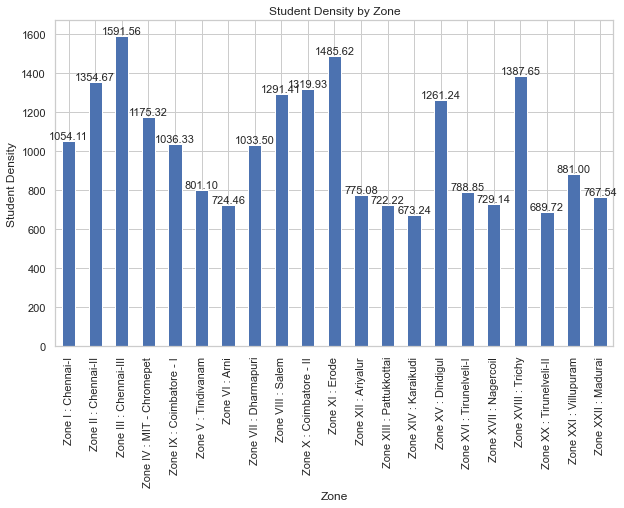

In [9]:
one_d_data = one_c_data['Total No of students'] / one_c_data['College Name']
print(f"Student density by zone: \n{one_d_data}")

# Display student density as a bar chart
ax = one_d_data.plot(kind='bar', figsize=(10,6))
plt.xlabel('Zone')
plt.ylabel('Student Density')
plt.title('Student Density by Zone')

for i, bar in enumerate(ax.containers):
    ax.bar_label(bar, label_type='edge', labels=[f"{val:.2f}" for val in one_d_data], fontsize=11)

plt.show()


In [15]:
zones = data['Zone'].unique()

def plot_graph(zone):
    zone_data = data[data['Zone'] == zone]
    plt.figure(figsize=(12, 6))
    plt.hist([zone_data['Total No of students'], zone_data['1st year']], bins=20, alpha=0.5, label=['Total Students', '1st Year'])
    plt.title(f'Histogram for Zone {zone}')
    plt.xlabel('Number of Students')
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

zone_dropdown1 = widgets.Dropdown(options=zones, description='Select Zone:')
output1 = widgets.Output()

def on_change1(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output1:
            output1.clear_output()
            plot_graph(change['new'])

zone_dropdown1.observe(on_change1)

display(zone_dropdown1)
display(output1)

Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()

In [11]:
two_b_data = data.groupby(['College Name', 'Zone', 'Disciplines']).agg({'Total No of students':'sum'}).reset_index()

In [16]:
# pivot the data to create a stacked bar chart
pivot_data = two_b_data.pivot(index='College Name', columns='Disciplines', values='Total No of students')


# define a function to update the chart based on the selected zone
def update_chart(zone_name):
    zone_data = two_b_data.loc[two_b_data['Zone'] == zone_name]
    pivot_data = zone_data.pivot(index='College Name', columns='Disciplines', values='Total No of students')
    pivot_data.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Total Number of Students by Department and College for Zone ' + zone_name)
    plt.xlabel('College Name')
    plt.ylabel('Number of Students')
    plt.show()



zone_dropdown2 = widgets.Dropdown(options=zones, description='Select Zone:')
output2 = widgets.Output()

def on_change22(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output2:
            output2.clear_output()
            update_chart(change['new'])

zone_dropdown2.observe(on_change22)

display(zone_dropdown2)
display(output2)

Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()

In [13]:
two_c_data = data.groupby(['Zone', 'Disciplines']).agg({'Total No of students':'sum', '1st year':'sum'}).reset_index()


In [17]:


# Define a function to update the histogram based on the selected zone
def update_histogram(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['Total No of students'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of Students in Each Discipline for Zone {zone}')
    
    # Show the plot
    plt.show()
    
def update_histogram1(zone):
    # Filter the data by the selected zone
    zone_data = two_c_data[two_c_data['Zone'] == zone]
    
    # Group the data by discipline and sum the total number of students
    discipline_data = zone_data.groupby('Disciplines')['1st year'].sum()
    
    # Create a bar plot with the number of students on the y-axis and the discipline on the x-axis
    plt.bar(discipline_data.index, discipline_data.values)
    
    # Add labels to the plot
    plt.xlabel('Discipline')
    plt.ylabel('Number of Students')
    plt.title(f'Number of 1st year Students in Each Discipline for Zone {zone}')
    
    # Show the plot
    plt.show()

zone_dropdown3 = widgets.Dropdown(options=zones, description='Select Zone:')
output3 = widgets.Output()

def on_change3(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output3:
            output3.clear_output()
            update_histogram(change['new'])
            update_histogram1(change['new'])

zone_dropdown3.observe(on_change3)

display(zone_dropdown3)
display(output3)


Dropdown(description='Select Zone:', options=('Zone I : Chennai-I', 'Zone II : Chennai-II', 'Zone III : Chenna…

Output()